In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cuml
import cudf
import array as arr
# import umap.umap_ as umap
import umap
import umap.plot

# import pycuda.autoinit
# import pycuda.gpuarray as gpuarray
# from skcuda.cublas import *
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelBinarizer
# from matplotlib.gridspec import GridSpec
from cuml.manifold.umap import UMAP as clUMAP
# from cuml.cluster import KMeans as cuKM
# from cuml.decomposition import PCA as cuPCA
# from sklearn.decomposition import PCA as skPCA
# from sklearn.cluster import KMeans as skKM
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
counts = pd.read_csv('/home/lima/Project/simulation/Comparision/all/normalized/NormalizedCountsCutOffValue0.csv')
counts = counts.rename(columns = {"Unnamed: 0": "GeneID"})

In [3]:
with open("CGRAllRSEM0Cut.pkl", "rb") as pkl_in:
    cgrCounts = pickle.load(pkl_in)
pkl_in.close()

In [4]:
convertedSeq = pd.DataFrame.from_dict(cgrCounts, orient = 'index')
seqList = convertedSeq.iloc[ : , 0].tolist()
idx = [i for i in range(len(seqList[0]))]
convertedSeq[idx] = pd.DataFrame(seqList, index = convertedSeq.index)
convertedSeq.reset_index(inplace = True)
convertedSeq.rename(columns = {"index": "GeneID"}, inplace = True)

In [5]:
samples = list(counts.columns.values)
samples = samples[1 : ]

In [6]:
geneIDs = list(convertedSeq['GeneID'])
cgrMatrix = convertedSeq.drop(columns = 'GeneID').to_numpy()
result = []

for sample in samples:
    # print(sample)
    sampleCounts = counts[sample].to_numpy()
    # print(sampleCounts.shape)
    sampleCounts = sampleCounts.reshape(len(sampleCounts), 1)
    
    tmp = cgrMatrix * sampleCounts
    colIdx = [i for i in range(tmp.shape[1])]
    labels = [sample] * len(tmp)
    # col = colIdx + lables
    
    df = pd.DataFrame(tmp, index = geneIDs)
    df['Label'] = labels
    result.append(df)
    

In [7]:
result = pd.concat(result)

In [8]:
rlt = result.drop(columns = 'Label')

In [9]:
rlt.reset_index(drop = True, inplace = True)
target = np.array(result.Label, dtype = np.str)
targetDF = pd.DataFrame(target)
encoder = LabelEncoder()
encodedLabels = encoder.fit_transform(target)
encodedLabelsDF = pd.Series(encodedLabels)
# arrEncodedLabels = arr.array('h', encodedLabels)
classesTotal = samples

In [16]:
nd_rlt = rlt.to_numpy().astype(float)
spars_rlt = csr_matrix(nd_rlt)
target = encodedLabels.reshape(len(encodedLabels), 1).astype(float)
spars_target = csr_matrix(target)

In [ ]:
embedding = umap.UMAP(n_neighbors = 100).fit_transform(spars_rlt, y = spars_target)

In [10]:
gdf = cudf.from_pandas(rlt)
gdf_target = cudf.from_pandas(encodedLabelsDF)

In [13]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 175, min_dist = 0.0, spread = 160, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

CPU times: user 41.6 s, sys: 4.52 s, total: 46.1 s
Wall time: 46 s


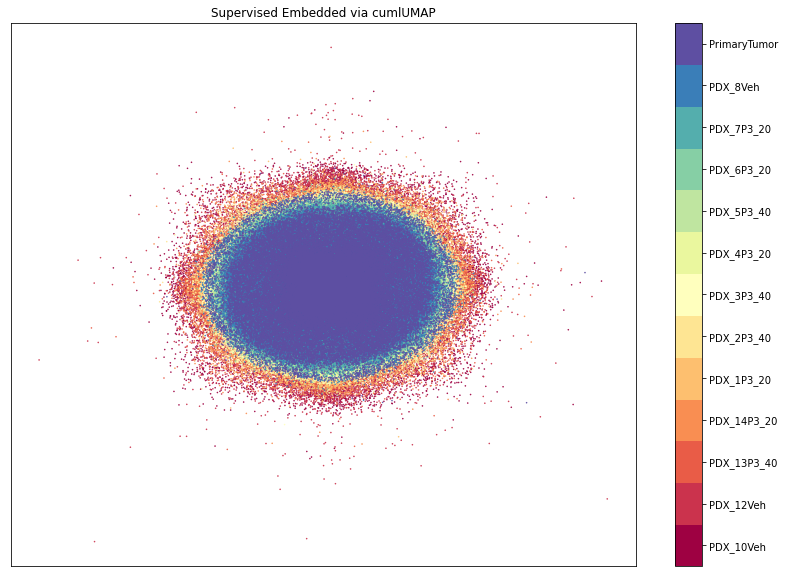

In [14]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');

In [11]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 175, min_dist = 0.0, spread = 155, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 43 s, sys: 5.18 s, total: 48.1 s
Wall time: 48.1 s


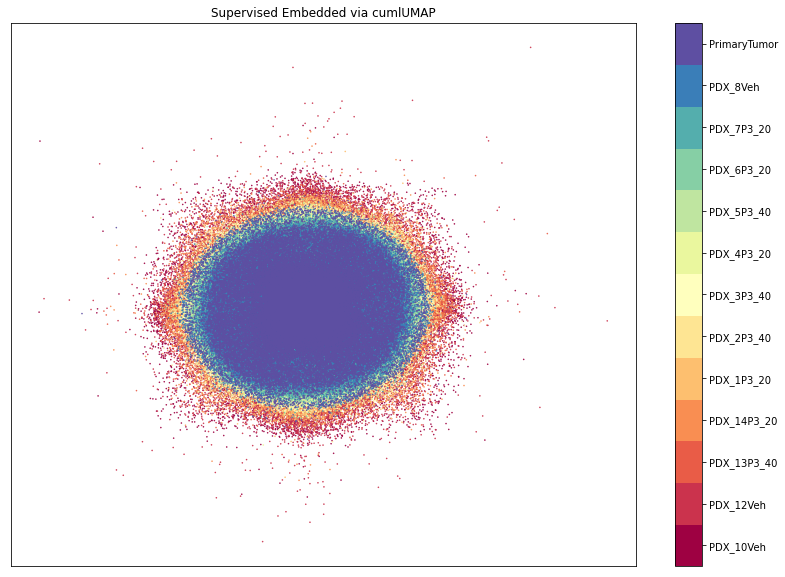

In [12]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');

In [11]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 175, min_dist = 0.0, spread = 150, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 43.6 s, sys: 4.54 s, total: 48.1 s
Wall time: 48.1 s


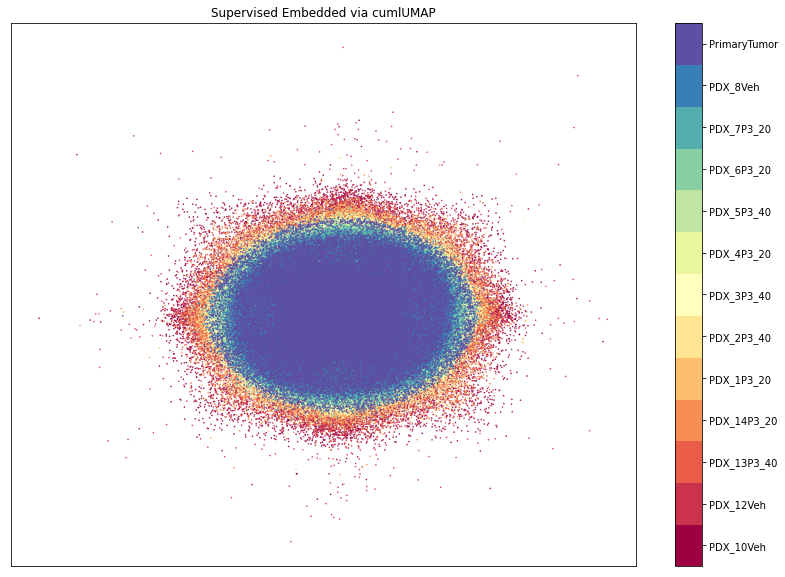

In [12]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');

In [11]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 180, min_dist = 0.0, spread = 180, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 44.6 s, sys: 4.59 s, total: 49.2 s
Wall time: 49.1 s


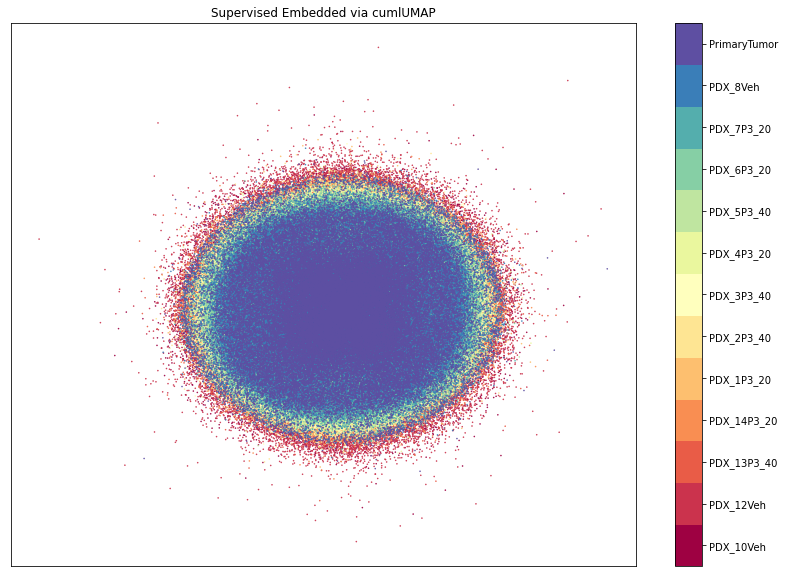

In [12]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');

In [11]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 180, min_dist = 0.0, spread = 160, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 44.5 s, sys: 4.68 s, total: 49.2 s
Wall time: 49.1 s


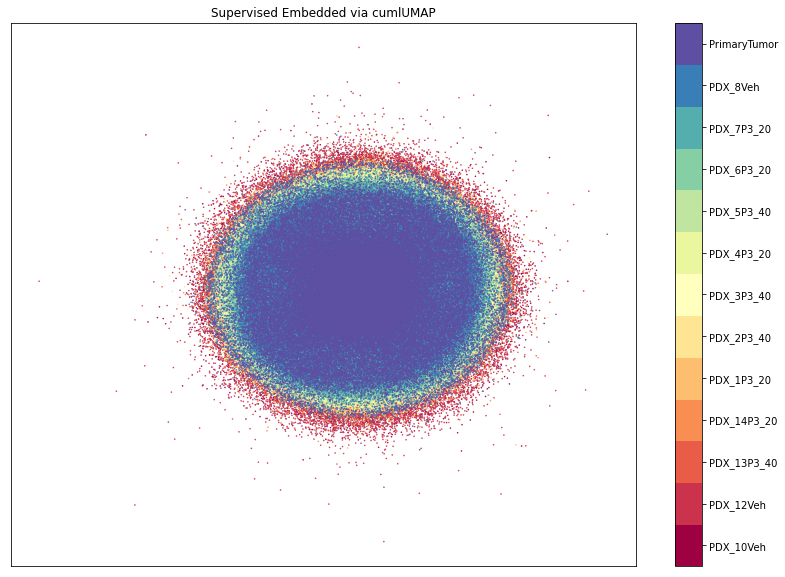

In [12]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');

In [11]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 180, min_dist = 0.0, spread = 150, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 44.2 s, sys: 4.96 s, total: 49.1 s
Wall time: 49 s


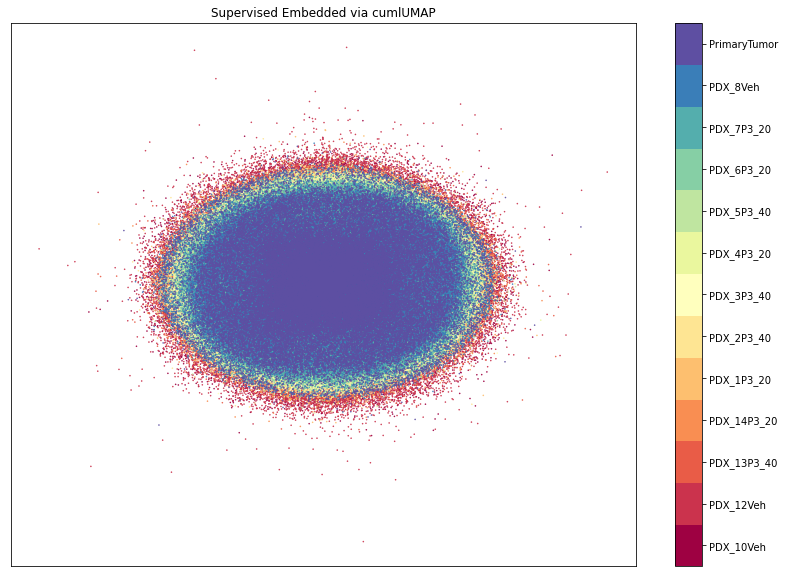

In [12]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');

In [11]:
%%time
embedding_supervised = clUMAP(verbose = False, n_neighbors = 180, min_dist = 0.0, spread = 145, 
                              init = "spectral", target_metric = "categorical").fit_transform(gdf, gdf_target)

/home/lima/miniconda3/envs/CONENV/lib/python3.7/site-packages/scipy/optimize/minpack.py:484: RuntimeWarning: divide by zero encountered in power
  return func(xdata, *params) - ydata


CPU times: user 44.6 s, sys: 4.55 s, total: 49.1 s
Wall time: 49.1 s


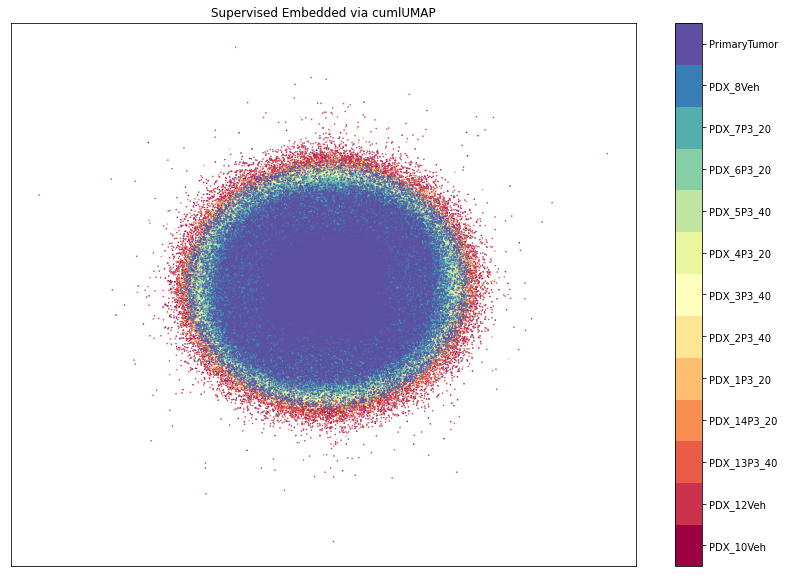

In [12]:
embedding_supervised_numpy = embedding_supervised.to_pandas().values
target = encodedLabels.astype(np.float32)
fig, ax = plt.subplots(1, figsize = (14, 10))
plt.scatter(embedding_supervised_numpy[ : , 1], embedding_supervised_numpy[ : , 0], s = 0.3, c = target, cmap = 'Spectral', alpha=1.0)
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(14) - 0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(samples)
plt.title('Supervised Embedded via cumlUMAP');